# Physique :  Traitement du Signal : Filtrage

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : October 17th 2020
- update : 
 

In [28]:
import os
import re
import numpy as np

In [29]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [31]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [32]:
from scipy import signal

In [33]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [34]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

### Continuous system

In [35]:
num = [1]

den = [0.01, 0.05, 1]

tffunc_cont=signal.TransferFunction(num, den)

In [36]:
# system
lti_cont=signal.lti(num, den)

In [37]:
tmin=0   # timin in sec
tmax=100 # tmax in seconds
T=10.0 # period
Nsamples=1000
dt=(tmax-tmin)/Nsamples

In [40]:
t = np.linspace(0, 100, Nsamples)  # 0-100 s

#X_t = np.sign(np.sin(2*np.pi*t/T)) 
X_t = signal.square(2 * np.pi * t/T)

In [41]:
tout, yout, xout =signal.lsim(lti_cont,U=X_t,T=t,X0=None, interp=True)

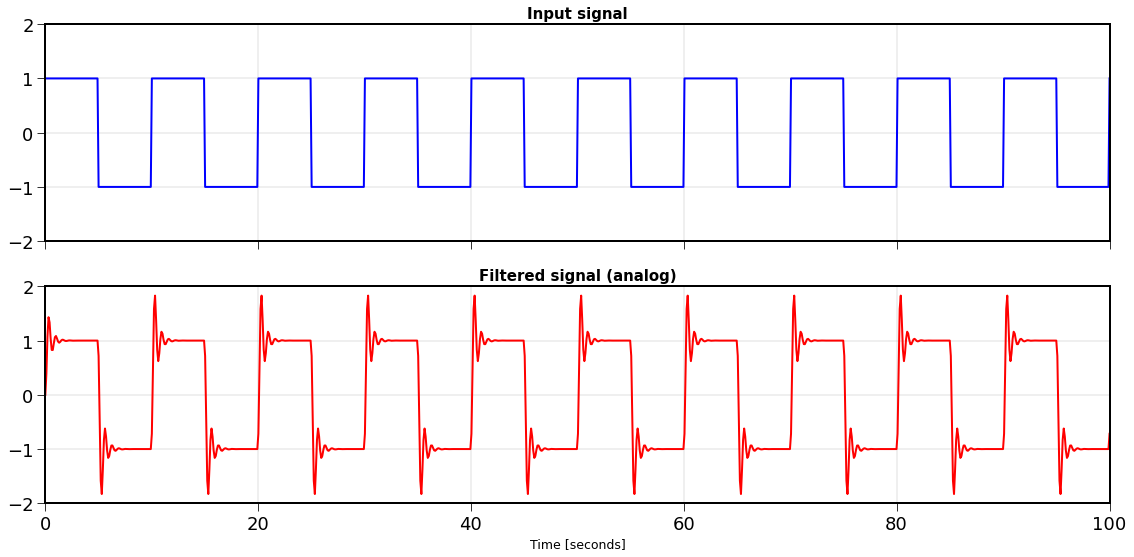

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(t, X_t,'b-')

ax1.set_title('Input signal')
ax1.axis([tmin, tmax, -2, 2])
ax1.grid()

ax2.plot(tout, yout,"r-")
#ax2.plot(t, X_t,"k:")

ax2.set_title('Filtered signal (analog)')
ax2.axis([tmin, tmax, -2, 2])
ax2.grid()

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
#plt.show()


FLAG_MPLD3=False

if FLAG_MPLD3:
    import mpld3
    from mpld3 import plugins
    mpld3.enable_notebook()
    plugins.connect(fig, plugins.MousePosition(fontsize=18))
    mpld3.show()

#import mpld3


## convert system in discrete filter

In [43]:
dlti=signal.cont2discrete((num,den),dt=dt,method='zoh', alpha=None)

In [44]:
t_outd, youtd = signal.dlsim(dlti, X_t, t)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/scipy/signal/filter_design.py:1626: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


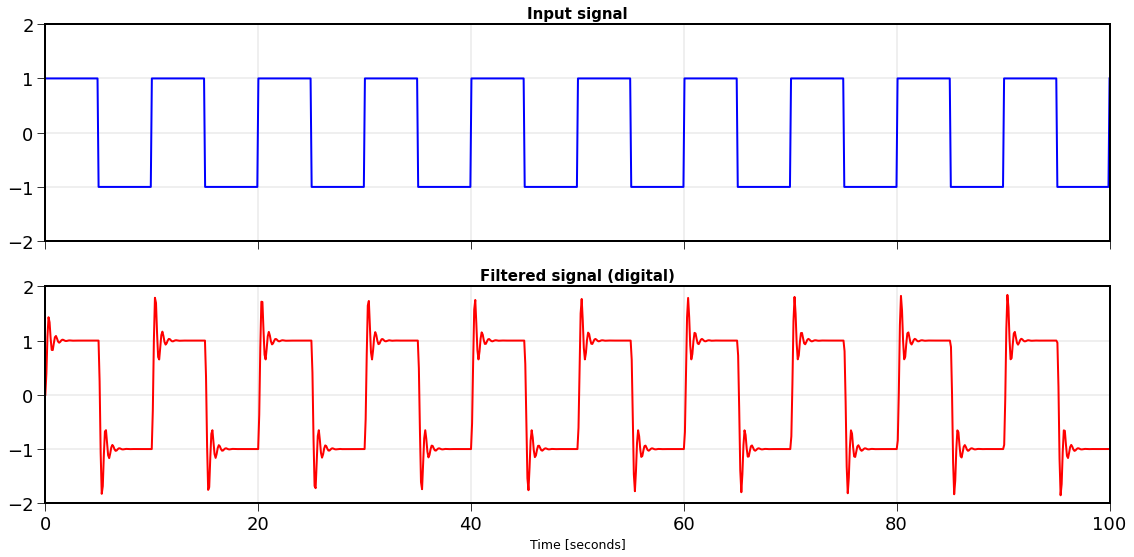

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(t, X_t,'b-')

ax1.set_title('Input signal')
ax1.axis([tmin, tmax, -2, 2])
ax1.grid()

ax2.plot(t_outd, youtd,"r-")

ax2.set_title('Filtered signal (digital)')
ax2.axis([tmin, tmax, -2, 2])
ax2.grid()

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
#plt.show()
